In [45]:
import requests
import json
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import os

### API request

In [46]:
# Loading the API key as an environment variable from .env file
API_KEY = os.getenv('API_KEY')  

url = "https://v3.football.api-sports.io/odds"
params = {'league': 39, 'season': 2023, 'date': '2023-12-30'}
headers = {
    'x-rapidapi-host': "v3.football.api-sports.io",
    'x-rapidapi-key': API_KEY  # Replace with your actual API key
}

try:
    response = requests.get(url, headers=headers, params=params)
    #response.raise_for_status()  # Raises an HTTPError for bad responses (4xx and 5xx)
except requests.exceptions.RequestException as error:
    print(f"An error occurred: {error}")
else:
    print("Request was successful!")
    data = response.json()

    # Save the response data to a file with a timestamp in the filename for unique identification
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")  
    filename = f'bets_{timestamp}.json'

    with open(filename, 'w') as json_file:
        json.dump(data, json_file, indent=2)
    print(f"Data successfully saved as {filename}")

Request was successful!
Data successfully saved as bets_20241209210848.json


### Preview of the JSON file

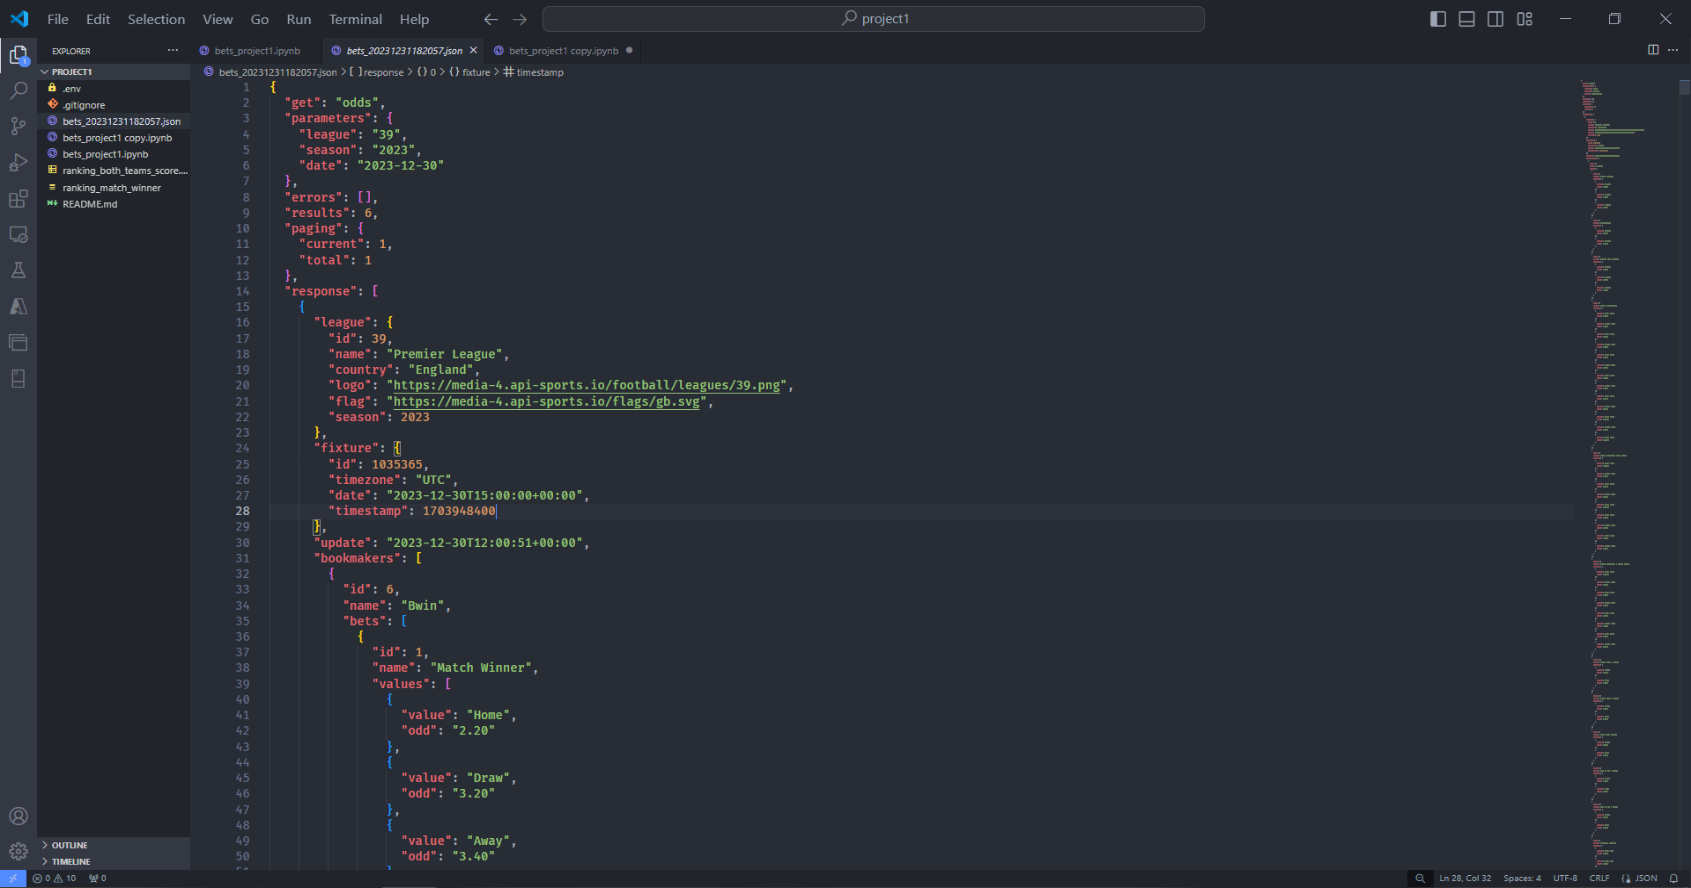

### **Data Transformation**
- #### Reading the saved JSON file.
- #### Extracting key information from the JSON, found within the **"response"** array, and creating a dataframe.

In [25]:
with open('bets_20231231182057.json', 'r') as file:
    df = json.load(file)

df = pd.DataFrame(df['response'])
df.head()

,league,fixture,update,bookmakers
0,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035365, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
1,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035364, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
2,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035373, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
3,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035369, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
4,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035368, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."


### The **json_normalize** function is used to normalize semi-structured JSON data into a flat table. This function is useful when dealing with nested JSON structures.

In [26]:
df = json_normalize(df.to_dict(orient='records'))
df.head()

,update,bookmakers,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp
0,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400
1,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035364,UTC,2023-12-30T15:00:00+00:00,1703948400
2,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035373,UTC,2023-12-30T15:00:00+00:00,1703948400
3,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035369,UTC,2023-12-30T15:00:00+00:00,1703948400
4,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035368,UTC,2023-12-30T12:30:00+00:00,1703939400


### The **"explode"** function is used to transform a column with lists or arrays of values into separate rows, duplicating the other columns accordingly.
- #### Exploding the **"bookmakers"** column and normalizing.

In [27]:
df = df.explode('bookmakers')
df = json_normalize(df.to_dict(orient='records'))
df.head()

,update,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp,bookmakers.id,bookmakers.name,bookmakers.bets
0,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
1,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,27,NordicBet,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
2,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,1,10Bet,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
3,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,7,William Hill,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
4,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,8,Bet365,"[{'id': 1, 'name': 'Match Winner', 'values': [..."


### Exploding the newly generated columns and normalizing.

In [28]:
df = df.explode('bookmakers.bets')
df = json_normalize(df.to_dict(orient='records'))
df = df.explode('bookmakers.bets.values')
df = json_normalize(df.to_dict(orient='records'))
df.head()

,update,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp,bookmakers.id,bookmakers.name,bookmakers.bets.id,bookmakers.bets.name,bookmakers.bets.values.value,bookmakers.bets.values.odd
0,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Home,2.20
1,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Draw,3.20
2,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Away,3.40
3,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Home,1.52
4,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Away,2.35


### We can implement a function based on the previous steps:

In [ ]:
def explode_flatten(file_path):
    with open(file_path, 'r') as file:
        df = pd.DataFrame(json.load(file)['response'])

    while True:
        df = json_normalize(df.to_dict(orient='records'))

        nested_columns = [col for col in df.columns if df[col].apply(type).eq(list).any()]

        if not nested_columns:
            break

        df = df.explode(nested_columns)

    return df    

explode_flatten('bets_20231231182057.json')

,update,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp,bookmakers.id,bookmakers.name,bookmakers.bets.id,bookmakers.bets.name,bookmakers.bets.values.value,bookmakers.bets.values.odd
0,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Home,2.20
1,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Draw,3.20
2,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Away,3.40
3,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Home,1.52
4,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Away,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29793,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,130,Corners 1x2 (1st Half),Away,2.07
29794,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,125,Corners Asian Handicap (1st Half),Home +0,2.07
29795,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,125,Corners Asian Handicap (1st Half),Away +0,1.77
29796,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,125,Corners Asian Handicap (1st Half),Home +0.25,1.89


#### Removing unnecessary columns and renaming the remaining ones.

In [30]:
df.drop(['update','league.id','league.name','league.country',
         'league.logo','league.flag','league.season','fixture.date',
         'fixture.timezone','fixture.timestamp'],
          axis=1,inplace=True)

df.rename(columns={'fixture.id':'fixture_id',
                   'bookmakers.name':'bookmaker',
                   'bookmakers.id':'bookmaker_id',
                   'bookmakers.bets.id':'bet_id',
                   'bookmakers.bets.name':'bet_market',
                   'bookmakers.bets.values.value':'bet_outcome',
                   'bookmakers.bets.values.odd':'odds'},
                    inplace=True)

#### Checking for null values and duplicates

In [37]:
df.isna().sum()

fixture_id      0
bookmaker_id    0
bookmaker       0
bet_id          0
bet_market      0
bet_outcome     0
odds            0
dtype: int64

In [43]:
df.duplicated().sum()

0

### **Data Exploration**

In [77]:
print(f'''There are {df.shape[0]} bets across {df.bet_market.nunique()} betting markets in the dataset involving 
{df.fixture_id.nunique()} Premier League matches that were played on December 30th.''')

print(f'There are {df.bookmaker.nunique()} bookmakers represented in the dataset:')
pd.DataFrame(df.bookmaker.unique()).set_index(0)                                                                    

There are 29798 bets across 183 betting markets in the dataset involving 
6 Premier League matches that were played on December 30th.
There are 19 bookmakers represented in the dataset:


""
0
Bwin
NordicBet
10Bet
William Hill
Bet365
Marathonbet
Unibet
Betfair
Betsson


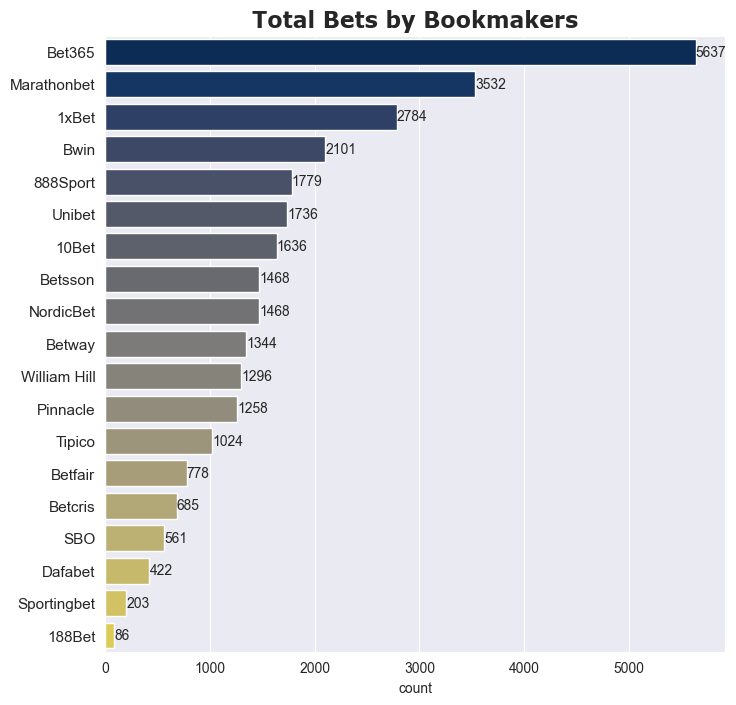

In [33]:
total_bets = df['bookmaker'].value_counts().reset_index()

plt.figure(figsize=(8, 8))
sns.set_style('darkgrid')
ax=sns.barplot(x='count', y='bookmaker',data=total_bets, palette='cividis',hue='bookmaker')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height()/2),va='center')

plt.ylabel(None)
plt.title('Total Bets by Bookmakers',fontdict={'fontsize':16,'fontweight':'bold','fontfamily':'Verdana'})
ax.tick_params(axis='y', labelsize=11)
plt.show()

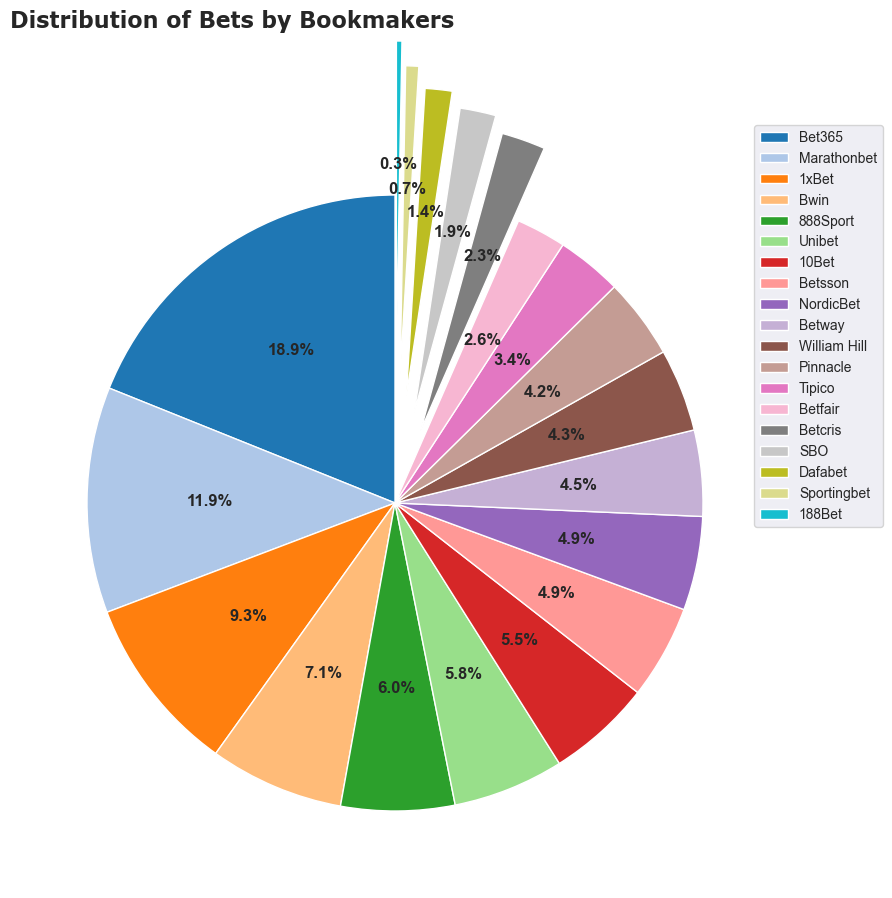

In [28]:
total_bets2 = df['bookmaker'].value_counts()

plt.figure(figsize=(10, 10))
sns.set_palette(sns.color_palette("tab20"))
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0.3,0.35,0.42,0.5)
plt.pie(x=total_bets2.values,labels=total_bets2.index,autopct='%1.1f%%',startangle=90,
        labeldistance=None,explode=explode,textprops={'fontsize':12,'fontweight':'bold'})
plt.title('Distribution of Bets by Bookmakers', loc='left',pad=65,
          fontdict={'fontsize':16,'fontweight':'bold','fontfamily':'Verdana'})
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper center')
plt.show()

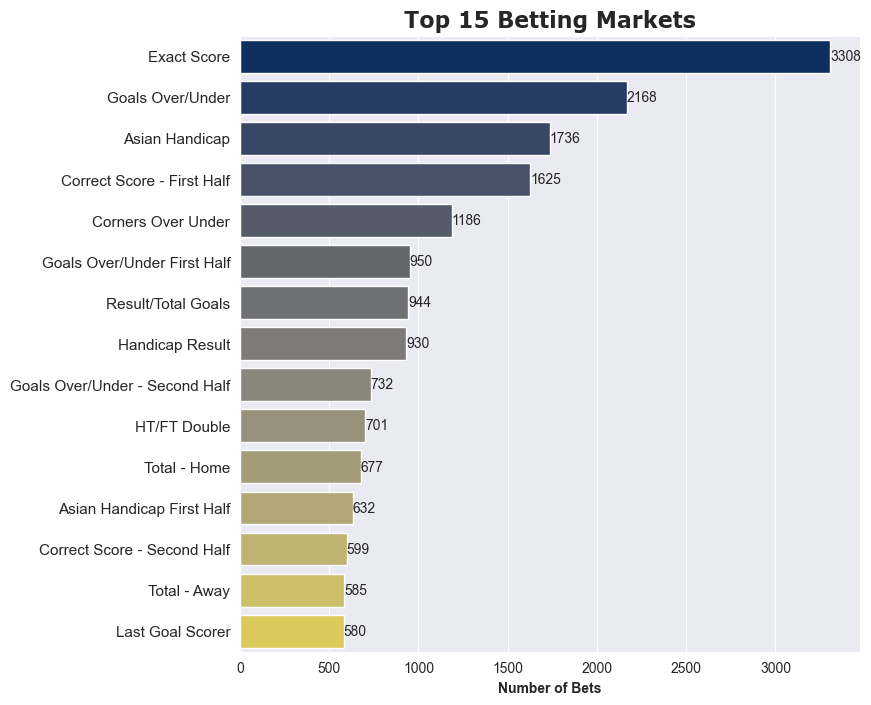

In [34]:
bet_market_count = df['bet_market'].value_counts().reset_index().head(15)

plt.figure(figsize=(8, 8))
ax=sns.barplot(x='count', y='bet_market',data=bet_market_count,palette='cividis',hue='bet_market')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(),p.get_y() + p.get_height()/2),va='center')

plt.title('Top 15 Betting Markets',fontdict={'fontsize':16,'fontweight':'bold','fontfamily':'Verdana'})
plt.xlabel('Number of Bets',fontdict={'fontweight':'bold'})
plt.ylabel(None)
ax.tick_params(axis='y', labelsize=11)
plt.show()

### **Bookmaker ranking**
- #### In this example I create a ranking of the bookmakers based on their odds offered for **Both Teams To Score: Yes**, which is a popular betting option.

In [95]:
df_test = df.query('bet_market == "Both Teams Score" & bet_outcome == "Yes"')
df_test = df_test.groupby(['fixture_id','bookmaker','odds']).size().reset_index()
df_test.drop(columns=(0),inplace=True)
df_test

,fixture_id,bookmaker,odds
0,1035364,10Bet,1.62
1,1035364,188Bet,1.71
2,1035364,1xBet,1.70
3,1035364,888Sport,1.76
4,1035364,Bet365,1.70
...,...,...,...
97,1035373,Pinnacle,1.78
98,1035373,Sportingbet,1.70
99,1035373,Tipico,1.65
100,1035373,Unibet,1.74


### Creating a pivot table to represent the odds for each fixture:
- #### If the bet is unavailable at a particular bookmaker, the value is set to NaN.
- #### If a fixture doesn't feature a minimum of 1 bet, it is excluded from the table. (less columns)
- #### If a bookmaker doesn't offer the bet for a minimum of 1 fixture, it is excluded from the table. (less rows)  

In [96]:
df_test = df_test.pivot(index='bookmaker', columns='fixture_id', values='odds')
df_test

fixture_id,1035364,1035365,1035368,1035369,1035370,1035373
bookmaker,,,,,,
10Bet,1.62,1.80,1.57,2.55,1.50,1.67
188Bet,1.71,1.88,1.66,2.85,1.57,1.77
1xBet,1.70,1.88,1.66,2.74,1.57,1.76
888Sport,1.76,1.91,1.68,2.48,1.61,1.74
Bet365,1.70,1.95,1.67,2.63,1.57,1.75
Betcris,1.70,1.90,1.68,2.65,1.58,1.75
Betfair,1.77,1.98,1.73,2.90,1.67,1.82
Betsson,1.70,1.90,1.64,2.77,1.57,1.76
Betway,1.70,1.88,1.67,2.70,1.60,1.75


### Applying the rank function
- #### The function assigns ranks to the odds in ascending order, with the best (highest) odds receiving 1.
- #### In case of ties where the odds are equal, the assigned rank is the same.
- #### NaN values receive the lowest rank.


In [97]:
df_test = df_test[df_test.columns].rank(ascending=False,method='dense',na_option='bottom')
df_test 

fixture_id,1035364,1035365,1035368,1035369,1035370,1035373
bookmaker,,,,,,
10Bet,7.0,7.0,9.0,11.0,8.0,9.0
188Bet,4.0,5.0,5.0,3.0,5.0,3.0
1xBet,5.0,5.0,5.0,6.0,5.0,4.0
888Sport,2.0,3.0,3.0,12.0,2.0,6.0
Bet365,5.0,2.0,4.0,9.0,5.0,5.0
Betcris,5.0,4.0,3.0,8.0,4.0,5.0
Betfair,1.0,1.0,1.0,2.0,1.0,1.0
Betsson,5.0,4.0,7.0,4.0,5.0,4.0
Betway,5.0,5.0,4.0,7.0,3.0,5.0


### The function calculates the average rank for each bookmaker in ascending order, with the best (lowest) average receiving 1.  
  
    
    



  

In [98]:
df_test[df_test.columns].mean(axis=1).sort_values().rank(method='min').astype(int).reset_index(name='rank') \
                        .set_index('bookmaker')

,rank
bookmaker,
Betfair,1
Pinnacle,2
188Bet,3
888Sport,4
Unibet,4
Betway,6
Betcris,6
Betsson,6
NordicBet,6


### Following this logic we can create a function which returns a table for each possible outcome of the betting market and the corresponding ranking of the bookmakers.
- #### The function takes our original dataframe and one or more betting markets as arguments:

In [5]:
def ranking_function(df, *bet_markets):
    # Convert bet_markets to a list
    bet_markets = list(bet_markets)

    # Get unique fixture IDs 
    fixture_ids = df['fixture_id'].unique()

    result_data = {}  # Dictionary to store DataFrames

    for bet_market_argument in bet_markets:
        # Filter for the specified bet market and fixture IDs
        filtered_df = df[(df['bet_market'] == bet_market_argument) & (df['fixture_id'].isin(fixture_ids))]

        # Get unique bet outcomes for the specified bet market
        bet_outcomes = filtered_df['bet_outcome'].unique()
        print(f"Total outcomes for {bet_market_argument}: {len(bet_outcomes)}")

        pivot_dfs = []  # List to store pivot DataFrames
        rank_dfs = []   # List to store rank DataFrames

        for idx, bet_outcome in enumerate(bet_outcomes, start=1):
            # Filter by both bet market and outcome
            filtered_data = filtered_df[filtered_df['bet_outcome'] == bet_outcome]
            
            # Use pivot table
            pivot_df = pd.pivot_table(filtered_data, values='odds', index='bookmaker', columns='fixture_id',
                                       aggfunc='min')

            # Calculate ranks
            rank_df = pivot_df.rank(method='dense', ascending=False, na_option='bottom').mean(axis=1).sort_values() \
                              .rank(method='min').astype(int).reset_index(name='rank').set_index('bookmaker') 
                            
            # Append DataFrames to the lists
            pivot_dfs.append(pivot_df)
            rank_dfs.append(rank_df)

            print(f"{idx} of {len(bet_outcomes)}")
            print(f"Odds for {bet_market_argument}: {bet_outcome}")
            print()
            print(pivot_df)
            print()
            print(rank_df)
            print("=" * 65)

        # Concatenate DataFrames from the lists along columns
        result_df = pd.concat([pd.concat(pivot_dfs, keys=bet_outcomes), pd.concat(rank_dfs, keys=bet_outcomes)], axis=1)
        
        # Store the concatenated DataFrame in the dictionary with the variable name
        result_data[bet_market_argument] = result_df

    return result_data

# Example
bet_market_arguments = ['Both Teams Score', 'Match Winner']

result_data = ranking_function(df, *bet_market_arguments)

Total outcomes for Both Teams Score: 2
1 of 2
Odds for Both Teams Score: Yes

fixture_id   1035364 1035365 1035368 1035369 1035370 1035373
bookmaker                                                   
10Bet           1.62    1.80    1.57    2.55    1.50    1.67
188Bet          1.71    1.88    1.66    2.85    1.57    1.77
1xBet           1.70    1.88    1.66    2.74    1.57    1.76
888Sport        1.76    1.91    1.68    2.48    1.61    1.74
Bet365          1.70    1.95    1.67    2.63    1.57    1.75
Betcris         1.70    1.90    1.68    2.65    1.58    1.75
Betfair         1.77    1.98    1.73    2.90    1.67    1.82
Betsson         1.70    1.90    1.64    2.77    1.57    1.76
Betway          1.70    1.88    1.67    2.70    1.60    1.75
Bwin            1.68    1.90    1.65    2.65    1.55    1.70
Marathonbet     1.70    1.88    1.66    2.74    1.57    1.76
NordicBet       1.70    1.90    1.64    2.77    1.57    1.76
Pinnacle        1.74    1.91    1.70    2.91    1.60    1.78
Sportin

### We can store the concatenated results in a dataframe:

In [6]:
df_both_teams_score = result_data['Both Teams Score'].reset_index().rename(columns={'level_0': 'outcome'})
df_both_teams_score

,outcome,bookmaker,1035364,1035365,1035368,1035369,1035370,1035373,rank
0,Yes,10Bet,1.62,1.80,1.57,2.55,1.50,1.67,16
1,Yes,188Bet,1.71,1.88,1.66,2.85,1.57,1.77,3
2,Yes,1xBet,1.70,1.88,1.66,2.74,1.57,1.76,10
3,Yes,888Sport,1.76,1.91,1.68,2.48,1.61,1.74,4
4,Yes,Bet365,1.70,1.95,1.67,2.63,1.57,1.75,10
5,Yes,Betcris,1.70,1.90,1.68,2.65,1.58,1.75,6
6,Yes,Betfair,1.77,1.98,1.73,2.90,1.67,1.82,1
7,Yes,Betsson,1.70,1.90,1.64,2.77,1.57,1.76,6
8,Yes,Betway,1.70,1.88,1.67,2.70,1.60,1.75,6
9,Yes,Bwin,1.68,1.90,1.65,2.65,1.55,1.70,13


In [7]:
df_match_winner = result_data['Match Winner'].reset_index().rename(columns={'level_0': 'outcome'})
df_match_winner

,outcome,bookmaker,1035364,1035365,1035368,1035369,1035370,1035373,rank
0,Home,10Bet,1.44,2.20,5.25,1.07,3.10,2.75,10
1,Home,188Bet,1.44,2.19,5.50,1.08,3.15,2.72,7
2,Home,1xBet,1.48,2.25,5.50,1.08,3.34,2.79,2
3,Home,888Sport,1.40,2.17,5.40,1.06,3.20,2.65,12
4,Home,Bet365,1.44,2.15,5.25,1.07,3.10,2.70,16
5,Home,Betcris,1.41,2.12,5.15,1.06,3.00,2.63,19
6,Home,Betfair,1.44,2.26,5.90,1.09,3.25,2.84,1
7,Home,Betsson,1.44,2.25,5.60,1.07,3.10,2.72,4
8,Home,Betway,1.44,2.20,5.00,1.07,3.10,2.70,14
9,Home,Bwin,1.43,2.20,5.25,1.07,3.10,2.70,12


### Saving the results as CSV:

In [8]:
df_both_teams_score.to_csv('ranking_both_teams_score.csv',index=False)
df_match_winner.to_csv('ranking_match_winner', index=False)